## Import the relevant libraries

In [1]:
import numpy as np
import pandas as pd
import scipy


import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
#For standardizing features

from sklearn.preprocessing import StandardScaler

#Hierarchical clustering with the Sci Py library. We'll use the dendrogram and linkage modules.
from scipy.cluster.hierarchy import dendrogram, linkage

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## Load the data

In [2]:
df_players_2019= pd.read_csv("players_2019.csv")

## Data exploration

### Players' performance 2019

In [3]:
df_players_2019.head()

,Unnamed: 0,Ranking,Move,Country,Player,Age,Points,Tourn Played,Points Dropping,Next Best,...,Service Games Won,Total Service Points Won,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won
0,0,1,NaN,NaN,Rafael Nadal,33,9985,17,0,0,...,90%,70%,35%,56%,556,45%,715,35%,42%,56%
1,1,2,NaN,NaN,Novak Djokovic,32,9145,17,90,0,...,88%,69%,34%,54%,516,49%,796,32%,42%,55%
2,2,3,NaN,NaN,Roger Federer,38,6590,17,0,0,...,91%,72%,32%,50%,507,41%,809,25%,39%,55%
3,3,4,NaN,NaN,Dominic Thiem,26,5825,22,0,0,...,84%,67%,29%,51%,466,41%,823,23%,37%,52%
4,4,5,NaN,NaN,Daniil Medvedev,23,5705,24,0,0,...,84%,67%,31%,56%,622,43%,963,28%,40%,53%


In [4]:
df_players_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   100 non-null    int64  
 1   Ranking                      100 non-null    int64  
 2   Move                         0 non-null      float64
 3   Country                      0 non-null      float64
 4   Player                       100 non-null    object 
 5   Age                          100 non-null    int64  
 6   Points                       100 non-null    int64  
 7   Tourn Played                 100 non-null    int64  
 8   Points Dropping              100 non-null    int64  
 9   Next Best                    100 non-null    int64  
 10  Turned Pro                   100 non-null    int64  
 11  index                        100 non-null    int64  
 12  Aces                         100 non-null    int64  
 13  Double Faults        

We see some columns with  numeric values aren't considered as such due to they have the percentage symbols next to it
and that columns Move and Country have NaN values

In [5]:
df_players_2019= df_players_2019.drop(['Unnamed: 0', 'Move', 'Country', 'Points Dropping', 'Next Best','index'], axis=1)
df_players_2019

,Ranking,Player,Age,Points,Tourn Played,Turned Pro,Aces,Double Faults,1st Serve,1st Serve Points Won,...,Service Games Won,Total Service Points Won,1st Serve Return Points Won,2nd Serve Return Points Won,Break Points Opportunities,Break Points Converted,Return Games Played,Return Games Won,Return Points Won,Total Points Won
0,1,Rafael Nadal,33,9985,17,2001,271,118,65%,76%,...,90%,70%,35%,56%,556,45%,715,35%,42%,56%
1,2,Novak Djokovic,32,9145,17,2003,373,166,66%,76%,...,88%,69%,34%,54%,516,49%,796,32%,42%,55%
2,3,Roger Federer,38,6590,17,1998,481,100,65%,78%,...,91%,72%,32%,50%,507,41%,809,25%,39%,55%
3,4,Dominic Thiem,26,5825,22,2011,314,138,66%,73%,...,84%,67%,29%,51%,466,41%,823,23%,37%,52%
4,5,Daniil Medvedev,23,5705,24,2014,690,254,60%,76%,...,84%,67%,31%,56%,622,43%,963,28%,40%,53%
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Salvatore Caruso,27,586,28,2010,11,17,69%,62%,...,70%,58%,32%,54%,88,47%,134,31%,41%,49%
96,97,Alexei Popyrin,20,585,25,2017,248,121,61%,73%,...,81%,64%,25%,43%,174,33%,405,14%,32%,49%
97,98,Egor Gerasimov,27,581,23,2010,130,38,67%,74%,...,83%,67%,26%,51%,89,27%,186,13%,35%,50%
98,99,Lloyd Harris,22,576,24,2015,200,57,62%,72%,...,74%,61%,25%,45%,100,45%,255,18%,33%,48%


In [6]:
df_players_2019['1st Serve']= df_players_2019['1st Serve'].apply(lambda x: int(x.strip('%')))
df_players_2019['1st Serve Points Won']= df_players_2019['1st Serve Points Won'].apply(lambda x: int(x.strip('%')))
df_players_2019['2nd Serve Points Won']= df_players_2019['2nd Serve Points Won'].apply(lambda x: int(x.strip('%')))
df_players_2019['Break Points Saved']= df_players_2019['Break Points Saved'].apply(lambda x: int(x.strip('%')))
df_players_2019['Service Games Won']= df_players_2019['Service Games Won'].apply(lambda x: int(x.strip('%')))
df_players_2019['Total Service Points Won']= df_players_2019['Total Service Points Won'].apply(lambda x: int(x.strip('%')))
df_players_2019['1st Serve Return Points Won']= df_players_2019['1st Serve Return Points Won'].apply(lambda x: int(x.strip('%')))
df_players_2019['2nd Serve Return Points Won']= df_players_2019['2nd Serve Return Points Won'].apply(lambda x: int(x.strip('%')))
df_players_2019['Break Points Converted']= df_players_2019['Break Points Converted'].apply(lambda x: int(x.strip('%')))
df_players_2019['Return Games Won']= df_players_2019['Return Games Won'].apply(lambda x: int(x.strip('%')))
df_players_2019['Return Points Won']= df_players_2019['Return Points Won'].apply(lambda x: int(x.strip('%')))
df_players_2019['Total Points Won']= df_players_2019['Total Points Won'].apply(lambda x: int(x.strip('%')))

df_players_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Ranking                      100 non-null    int64 
 1   Player                       100 non-null    object
 2   Age                          100 non-null    int64 
 3   Points                       100 non-null    int64 
 4   Tourn Played                 100 non-null    int64 
 5   Turned Pro                   100 non-null    int64 
 6   Aces                         100 non-null    int64 
 7   Double Faults                100 non-null    int64 
 8   1st Serve                    100 non-null    int64 
 9   1st Serve Points Won         100 non-null    int64 
 10  2nd Serve Points Won         100 non-null    int64 
 11  Break Points Faced           100 non-null    int64 
 12  Break Points Saved           100 non-null    int64 
 13  Service Games Played         100 non

In [7]:
df_players_2019.columns

Index(['Ranking', 'Player', 'Age', 'Points', 'Tourn Played', 'Turned Pro',
       'Aces', 'Double Faults', '1st Serve', '1st Serve Points Won',
       '2nd Serve Points Won', 'Break Points Faced', 'Break Points Saved',
       'Service Games Played', 'Service Games Won', 'Total Service Points Won',
       '1st Serve Return Points Won', '2nd Serve Return Points Won',
       'Break Points Opportunities', 'Break Points Converted',
       'Return Games Played', 'Return Games Won', 'Return Points Won',
       'Total Points Won'],
      dtype='object')

In [8]:
cols= ['Ranking', 'Player', 'Age', 'Points', 'Tourn Played', 'Turned Pro',
       'Aces', 'Double Faults', '1st Serve %', '1st Serve Points Won %',
       '2nd Serve Points Won %', 'Break Points Faced', 'Break Points Saved %',
       'Service Games Played', 'Service Games Won %', 'Total Service Points Won %',
       '1st Serve Return Points Won %', '2nd Serve Return Points Won %',
       'Break Points Opportunities', 'Break Points Converted %',
       'Return Games Played', 'Return Games Won %', 'Return Points Won %',
       'Total Points Won %']


df_players_2019.columns= cols

In [9]:
df_players_2019

,Ranking,Player,Age,Points,Tourn Played,Turned Pro,Aces,Double Faults,1st Serve %,1st Serve Points Won %,...,Service Games Won %,Total Service Points Won %,1st Serve Return Points Won %,2nd Serve Return Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %
0,1,Rafael Nadal,33,9985,17,2001,271,118,65,76,...,90,70,35,56,556,45,715,35,42,56
1,2,Novak Djokovic,32,9145,17,2003,373,166,66,76,...,88,69,34,54,516,49,796,32,42,55
2,3,Roger Federer,38,6590,17,1998,481,100,65,78,...,91,72,32,50,507,41,809,25,39,55
3,4,Dominic Thiem,26,5825,22,2011,314,138,66,73,...,84,67,29,51,466,41,823,23,37,52
4,5,Daniil Medvedev,23,5705,24,2014,690,254,60,76,...,84,67,31,56,622,43,963,28,40,53
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Salvatore Caruso,27,586,28,2010,11,17,69,62,...,70,58,32,54,88,47,134,31,41,49
96,97,Alexei Popyrin,20,585,25,2017,248,121,61,73,...,81,64,25,43,174,33,405,14,32,49
97,98,Egor Gerasimov,27,581,23,2010,130,38,67,74,...,83,67,26,51,89,27,186,13,35,50
98,99,Lloyd Harris,22,576,24,2015,200,57,62,72,...,74,61,25,45,100,45,255,18,33,48


In [10]:
df_players_2019['Career Length']= 2019- df_players_2019['Turned Pro']
df_players_2019= df_players_2019.drop(['Turned Pro'], axis=1)
df_players_2019['Career Length']

0     18
1     16
2     21
3      8
4      5
      ..
95     9
96     2
97     9
98     4
99     9
Name: Career Length, Length: 100, dtype: int64

In [11]:
df_players_2019.describe()

,Ranking,Age,Points,Tourn Played,Aces,Double Faults,1st Serve %,1st Serve Points Won %,2nd Serve Points Won %,Break Points Faced,...,Total Service Points Won %,1st Serve Return Points Won %,2nd Serve Return Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %,Career Length
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,...,100.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.00000,100.000000,100.000000,100.000000
mean,50.500000,27.200000,1493.790000,24.570000,286.920000,122.620000,62.460000,72.16000,51.230000,262.860000,...,64.240000,28.270000,49.180000,283.740000,39.060000,524.79000,20.71000,36.200000,50.180000,9.300000
std,29.011492,4.933907,1587.881819,3.704365,205.264485,70.525986,3.594103,4.64871,3.168197,106.605666,...,3.417483,2.714923,3.373635,138.844337,5.050893,212.26105,4.84569,2.821276,1.546452,5.022173
min,1.000000,18.000000,576.000000,14.000000,11.000000,5.000000,52.000000,61.00000,43.000000,25.000000,...,57.000000,20.000000,36.000000,10.000000,27.000000,39.00000,5.00000,25.000000,46.000000,0.000000
25%,25.750000,23.000000,740.250000,23.000000,145.750000,83.500000,60.000000,69.00000,49.000000,201.250000,...,62.000000,27.000000,47.000000,195.000000,36.000000,419.00000,18.00000,35.000000,49.000000,5.000000
50%,50.500000,27.000000,1003.500000,25.000000,243.000000,116.500000,62.000000,72.00000,51.500000,282.000000,...,64.000000,28.000000,49.000000,281.000000,39.000000,552.50000,20.50000,36.000000,50.000000,9.000000
75%,75.250000,31.000000,1470.000000,27.000000,371.250000,152.500000,65.000000,75.00000,53.000000,333.250000,...,66.000000,30.000000,51.000000,375.750000,42.000000,669.75000,24.00000,38.000000,51.000000,12.250000
max,100.000000,40.000000,9985.000000,33.000000,1032.000000,410.000000,72.000000,84.00000,60.000000,461.000000,...,74.000000,35.000000,56.000000,622.000000,61.000000,1028.00000,35.00000,42.000000,56.000000,22.000000


In [12]:
categorical_data_all= df_players_2019.select_dtypes('object')
numerical_data_all= df_players_2019.select_dtypes('number')

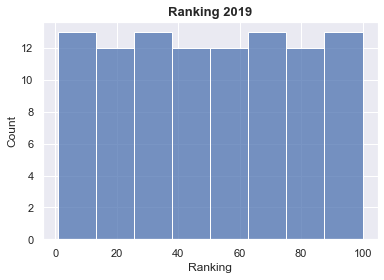

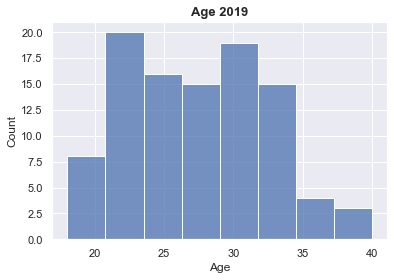

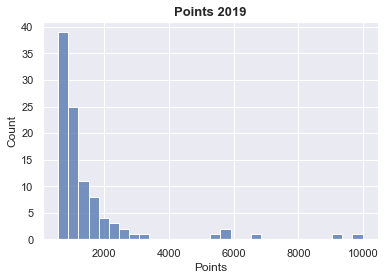

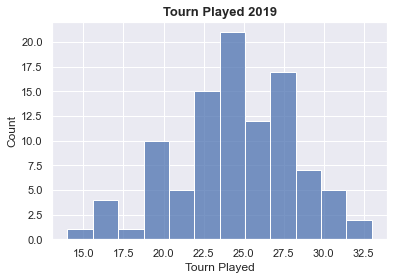

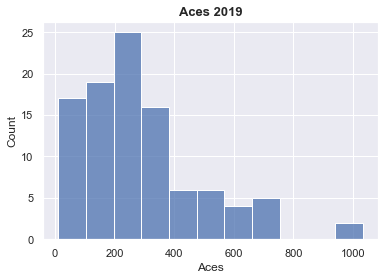

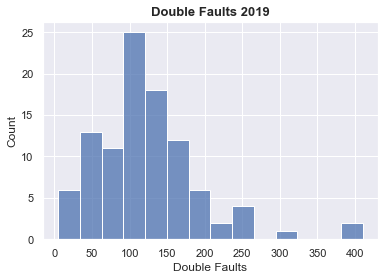

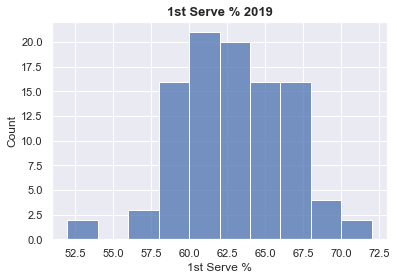

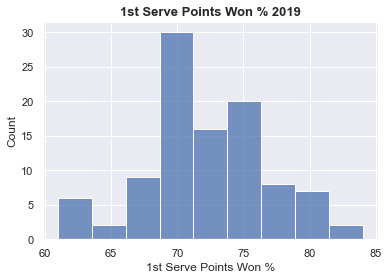

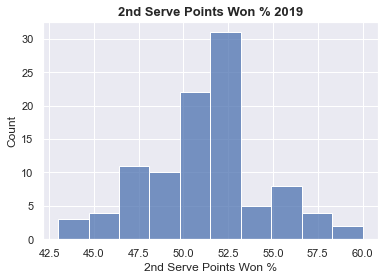

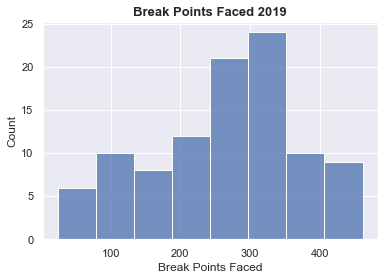

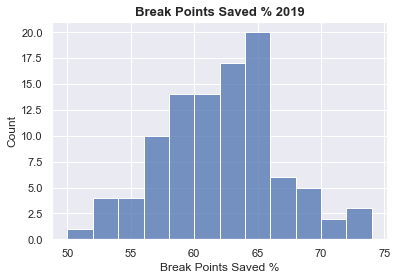

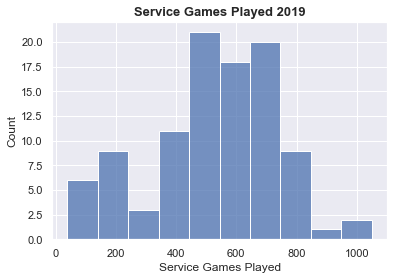

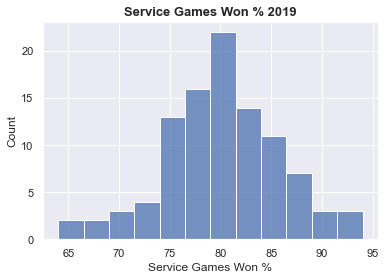

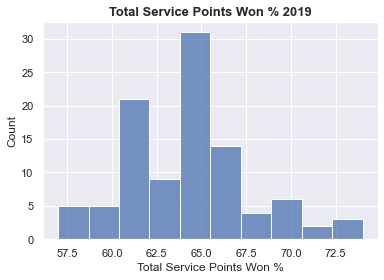

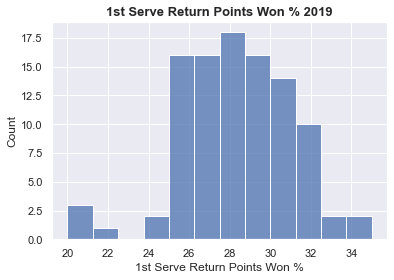

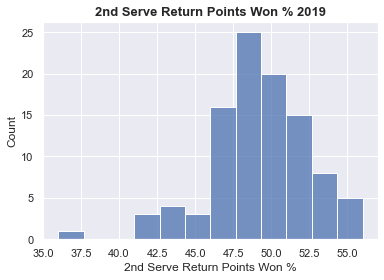

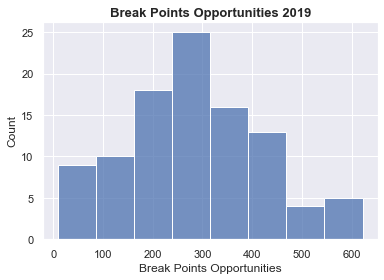

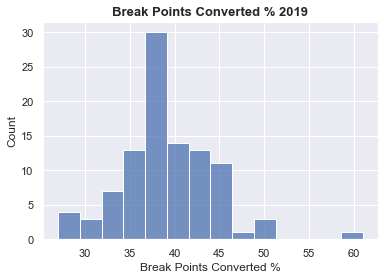

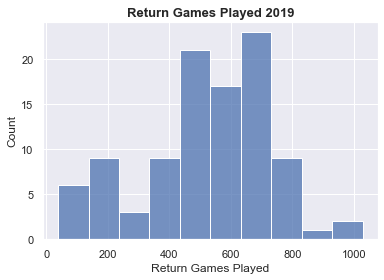

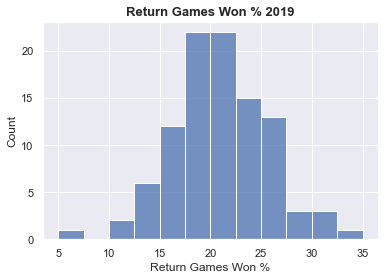

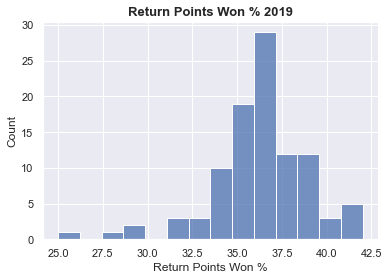

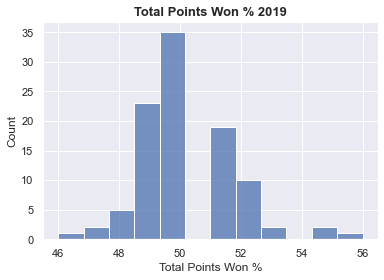

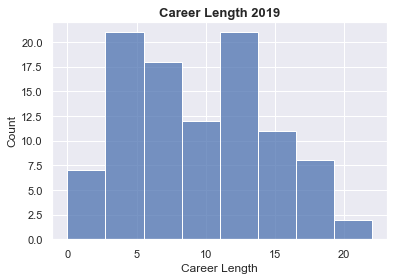

In [13]:
#Distribution of all numeric categories

for i in numerical_data_all.columns:
    sns.histplot(numerical_data_all[i])
    plt.title(i +" 2019",fontsize=13, fontweight= "bold")
    plt.show()

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


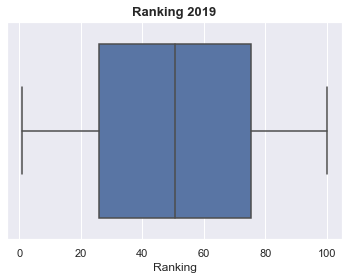

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


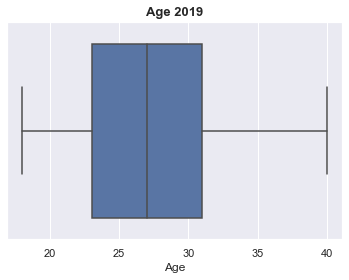

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


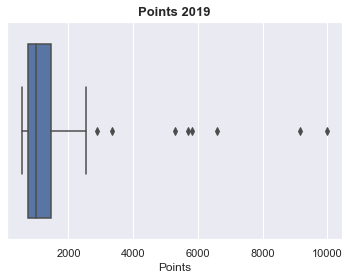

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


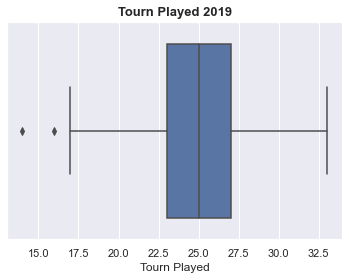

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


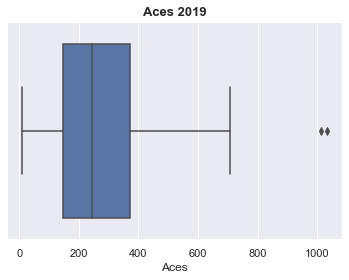

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


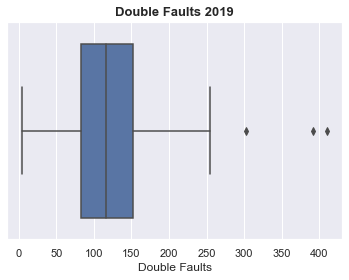

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


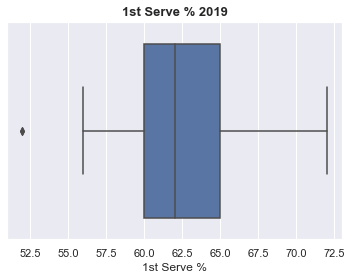

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


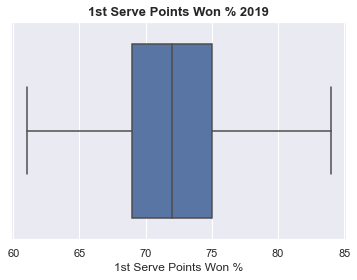

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


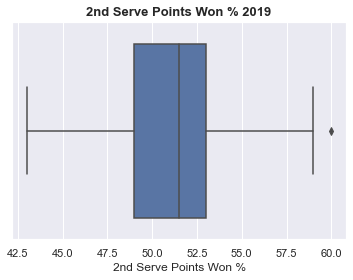

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


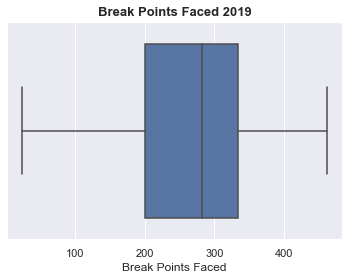

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


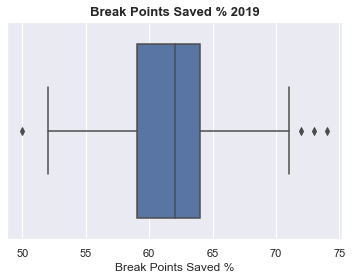

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


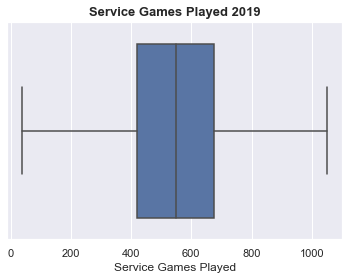

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


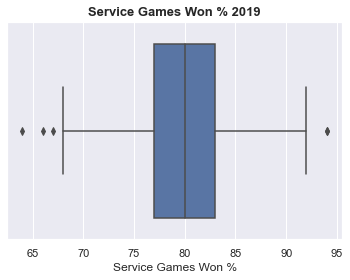

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


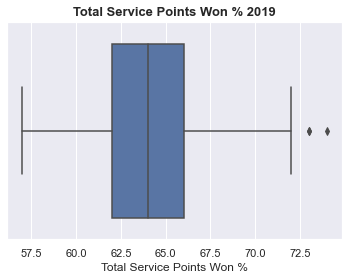

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


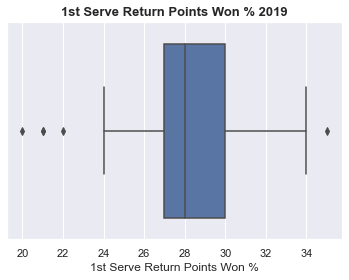

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


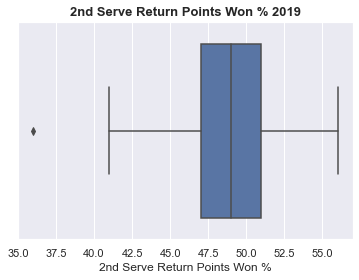

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


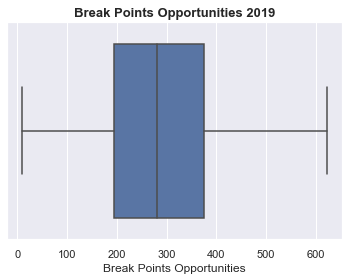

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


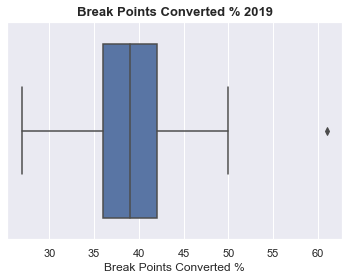

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


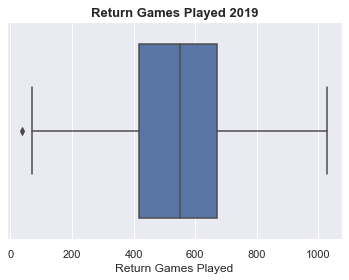

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


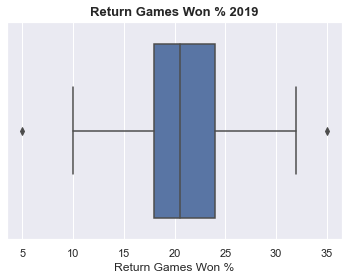

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


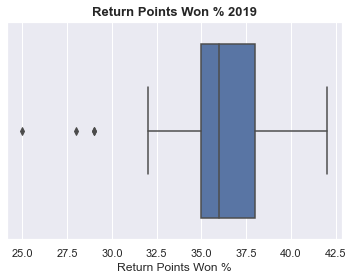

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


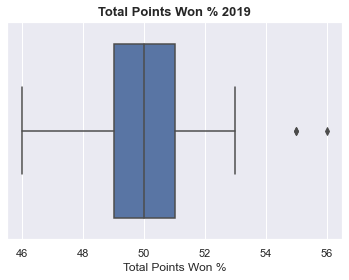

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


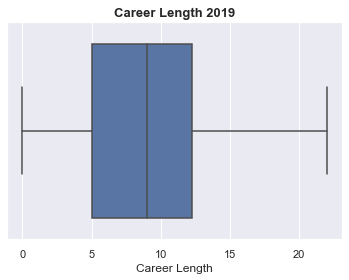

In [14]:
#Distribution of all numeric categories, evaluating outliers

for i in numerical_data_all.columns:
    sns.boxplot(numerical_data_all[i])
    plt.title(i + " 2019",fontsize=13, fontweight= "bold")
    plt.show()

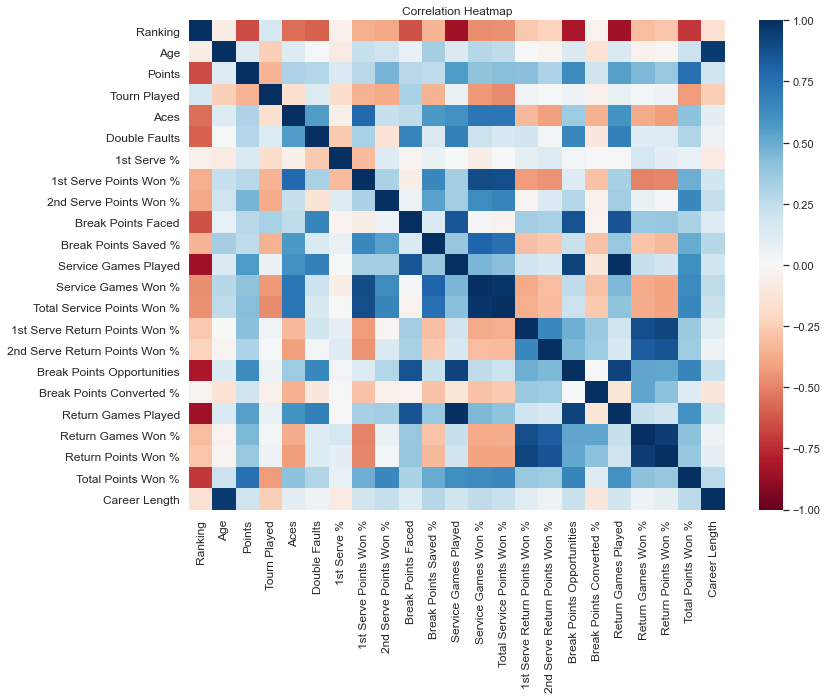

In [15]:
# We'll plot the correlations using a Heat Map. 

plt.figure(figsize = (12, 9))
s = sns.heatmap(df_players_2019.corr(),
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

We see a high correlation between age and Career Length

## Data frame with variables considered most insightful after Exploratory Data analysis 

In [16]:
df_players_2019.columns

Index(['Ranking', 'Player', 'Age', 'Points', 'Tourn Played', 'Aces',
       'Double Faults', '1st Serve %', '1st Serve Points Won %',
       '2nd Serve Points Won %', 'Break Points Faced', 'Break Points Saved %',
       'Service Games Played', 'Service Games Won %',
       'Total Service Points Won %', '1st Serve Return Points Won %',
       '2nd Serve Return Points Won %', 'Break Points Opportunities',
       'Break Points Converted %', 'Return Games Played', 'Return Games Won %',
       'Return Points Won %', 'Total Points Won %', 'Career Length'],
      dtype='object')

In [17]:
eda_players_2019= df_players_2019.copy()
df_players_2019= df_players_2019.drop(['Age','1st Serve %', '1st Serve Points Won %',
                                   '2nd Serve Points Won %' , 'Break Points Faced', 'Break Points Saved %',
                                   'Service Games Won %', '1st Serve Return Points Won %', '2nd Serve Return Points Won %'
                                    ], axis=1)

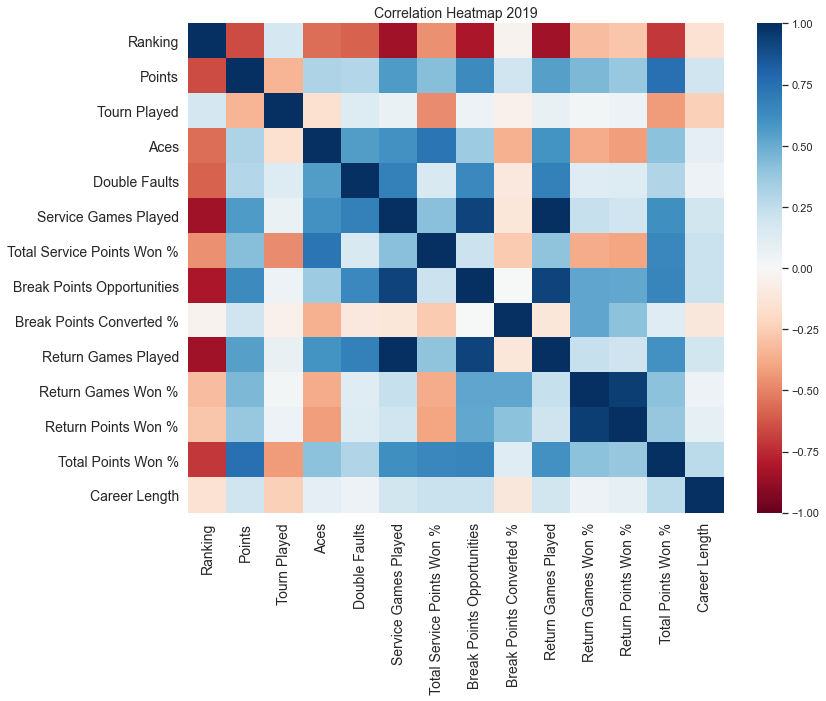

In [18]:
# We'll plot the correlations using a Heat Map. 

plt.figure(figsize = (12, 9))
s = sns.heatmap(df_players_2019.corr(),
               cmap = 'RdBu',
               vmin = -1, 
               vmax = 1)
s.set_yticklabels(s.get_yticklabels(), rotation = 0, fontsize = 14)
s.set_xticklabels(s.get_xticklabels(), rotation = 90, fontsize = 14)
plt.title('Correlation Heatmap 2019',  fontsize = 14)
plt.show()

In [19]:
df_players_2019.shape

(100, 15)

In [20]:
categorical_data= df_players_2019.select_dtypes('object')
numerical_data= df_players_2019.select_dtypes('number')

## Visualize Raw Data

Text(0.5, 1.0, 'Visualization of raw data')

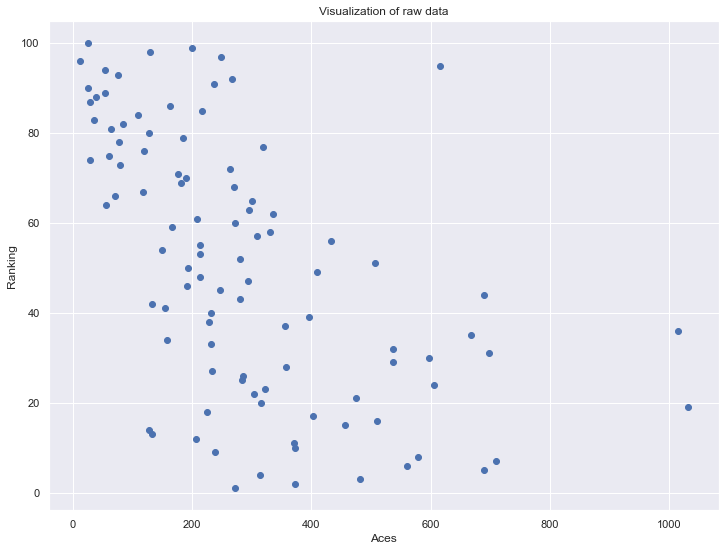

In [21]:
# We'll plot the data. We create a 12 by 9 inches figure.
# We have 2000 data points, which we'll scatter acrros Age and Income, located on positions 2 and 4 in our data set. 
plt.figure(figsize = (12, 9))
plt.scatter(df_players_2019.iloc[:, 4], df_players_2019.iloc[:, 0])
plt.xlabel('Aces')
plt.ylabel('Ranking')
plt.title('Visualization of raw data')

## Standardization

In [22]:
scaler = StandardScaler()
players_2019_std = scaler.fit_transform(numerical_data)

## ${\textbf{Hierarchical Clustering}}$

In [23]:
# Perform Hierarchical Clustering. The results are returned as a linkage matrix. 
hier_clust = linkage(players_2019_std, method = 'ward')

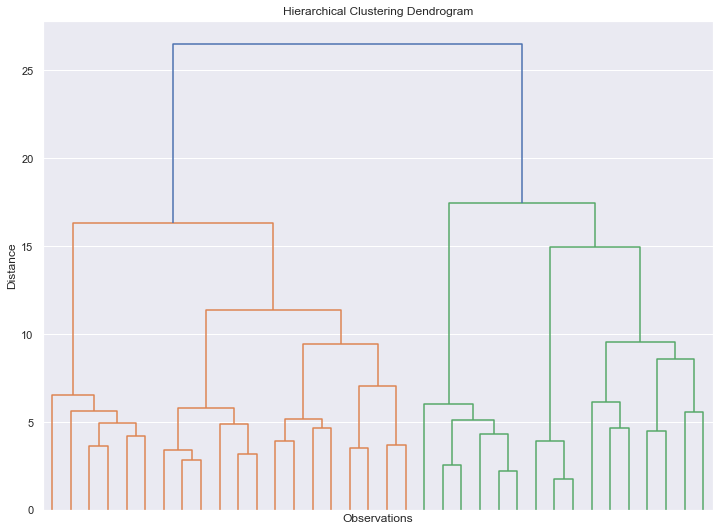

In [24]:
# We plot the results from the Hierarchical Clustering using a Dendrogram. 
# We truncate the dendrogram for better readability. The level p shows only the last p merged clusters
# We also omit showing the labels for each point.
plt.figure(figsize = (12,9))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Observations')
plt.ylabel('Distance')
dendrogram(hier_clust,
           truncate_mode = 'level', 
           p = 5, 
           show_leaf_counts = False, 
           no_labels = True)
plt.show()

## ${\textbf{K-means Clustering}}$

In [25]:
# Perform K-means clustering. We consider 1 to 10 clusters, so our for loop runs 10 iterations.
# In addition we run the algortihm at many different starting points - k means plus plus. 
# And we set a random state for reproducibility.
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans.fit(players_2019_std)
    wcss.append(kmeans.inertia_)

C:\Users\Vanessa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


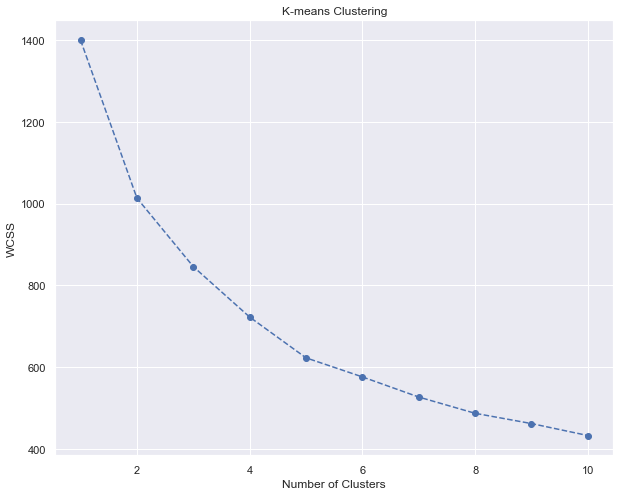

In [26]:
# Plot the Within Cluster Sum of Squares for the different number of clusters.
# From this plot we choose the number of clusters. 
# We look for a kink in the graphic, after which the descent of wcss isn't as pronounced.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

In [27]:
# We run K-means with a fixed number of clusters. In our case 4.
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 1)

In [28]:
# We divide our data into the four clusters.
kmeans.fit(players_2019_std)

KMeans(n_clusters=4, random_state=1)

## Results

In [29]:
# We create a new data frame with the original features and add a new column with the assigned clusters for each point.
df_players_2019_kmeans = df_players_2019.copy()
df_players_2019_kmeans['Segment K-means'] = kmeans.labels_

In [30]:
# Calculate mean values for the clusters
df_players_2019_analysis = df_players_2019_kmeans.groupby(['Segment K-means']).mean()
df_players_2019_analysis

,Ranking,Points,Tourn Played,Aces,Double Faults,Service Games Played,Total Service Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %,Career Length
Segment K-means,,,,,,,,,,,,,,
0,13.800000,3246.400000,23.560000,398.920000,188.760000,758.240000,65.720000,451.160000,40.440000,754.160000,24.200000,38.240000,51.760000,9.920000
1,86.500000,642.666667,24.777778,64.944444,40.888889,177.055556,61.111111,97.277778,41.222222,178.222222,20.944444,36.500000,48.722222,6.333333
2,55.918367,973.653061,25.877551,251.693878,120.408163,543.653061,63.612245,285.265306,38.612245,543.673469,20.244898,35.938776,49.836735,9.571429
3,51.000000,1117.750000,19.250000,652.125000,113.375000,473.875000,70.500000,170.750000,32.625000,472.125000,12.125000,30.750000,50.625000,12.375000


In [31]:
# Compute the size and proportions of the two clusters
df_players_2019_analysis['N Obs'] = df_players_2019_kmeans[['Segment K-means','Ranking']].groupby(['Segment K-means']).count()
df_players_2019_analysis['Prop Obs'] = df_players_2019_analysis['N Obs'] / df_players_2019_analysis['N Obs'].sum()

In [32]:
df_players_2019_analysis

,Ranking,Points,Tourn Played,Aces,Double Faults,Service Games Played,Total Service Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %,Career Length,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,,
0,13.800000,3246.400000,23.560000,398.920000,188.760000,758.240000,65.720000,451.160000,40.440000,754.160000,24.200000,38.240000,51.760000,9.920000,25,0.25
1,86.500000,642.666667,24.777778,64.944444,40.888889,177.055556,61.111111,97.277778,41.222222,178.222222,20.944444,36.500000,48.722222,6.333333,18,0.18
2,55.918367,973.653061,25.877551,251.693878,120.408163,543.653061,63.612245,285.265306,38.612245,543.673469,20.244898,35.938776,49.836735,9.571429,49,0.49
3,51.000000,1117.750000,19.250000,652.125000,113.375000,473.875000,70.500000,170.750000,32.625000,472.125000,12.125000,30.750000,50.625000,12.375000,8,0.08


In [33]:
df_players_2019_analysis.rename({0:'Top-Players',
                                 1:'Worst-Players',
                                 2:'Average-Players',
                                 3:'Great-Players'
                                 })

,Ranking,Points,Tourn Played,Aces,Double Faults,Service Games Played,Total Service Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %,Career Length,N Obs,Prop Obs
Segment K-means,,,,,,,,,,,,,,,,
Top-Players,13.800000,3246.400000,23.560000,398.920000,188.760000,758.240000,65.720000,451.160000,40.440000,754.160000,24.200000,38.240000,51.760000,9.920000,25,0.25
Worst-Players,86.500000,642.666667,24.777778,64.944444,40.888889,177.055556,61.111111,97.277778,41.222222,178.222222,20.944444,36.500000,48.722222,6.333333,18,0.18
Average-Players,55.918367,973.653061,25.877551,251.693878,120.408163,543.653061,63.612245,285.265306,38.612245,543.673469,20.244898,35.938776,49.836735,9.571429,49,0.49
Great-Players,51.000000,1117.750000,19.250000,652.125000,113.375000,473.875000,70.500000,170.750000,32.625000,472.125000,12.125000,30.750000,50.625000,12.375000,8,0.08


In [34]:
# Add the segment labels to our table
df_players_2019_kmeans['Labels'] = df_players_2019_kmeans['Segment K-means'].map({0:'Top-Players',
                                                                             1:'Worst-Players',
                                                                             2:'Average-Players',
                                                                             3:'Great-Players'
                                                                             })

### We plot the results from the K-means algorithm clustering players by  "Aces"

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


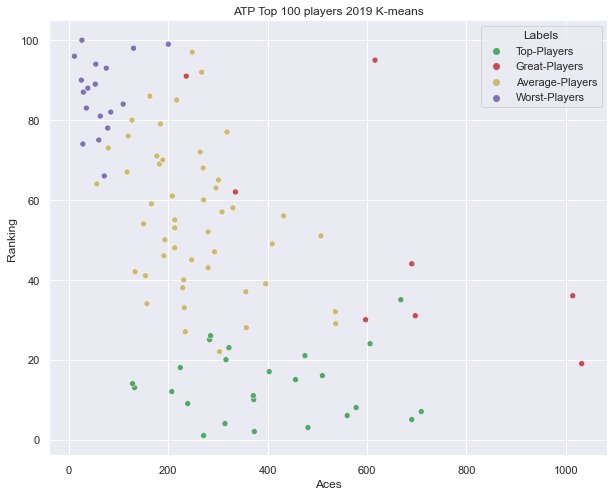

In [35]:
# We plot the results from the K-means algorithm. 
# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_players_2019_kmeans['Aces']
y_axis = df_players_2019_kmeans['Ranking']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_players_2019_kmeans['Labels'], palette = ['g', 'r', 'y', 'm'])
plt.title('ATP Top 100 players 2019 K-means')
plt.show() 

#according to correlation map, these are the variables that have the highest impact on ranking 
#'Service Games Played'
#'Return Games Played'
#'Total Points Won %'
##SO, overall, experience is most valuable, it might explain the next gen tournement founded at 2017

### We plot the results from the K-means algorithm clustering players by "Break Points Opportunities"

C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


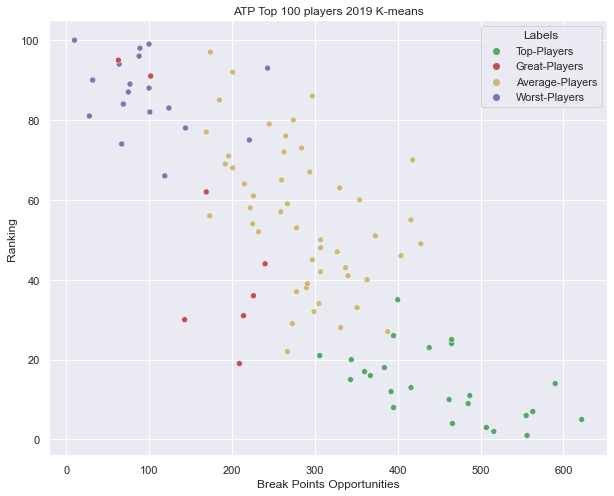

In [36]:

# Each point in our data set is plotted with the color of the clusters it has been assigned to.
x_axis = df_players_2019_kmeans['Break Points Opportunities']
y_axis = df_players_2019_kmeans['Ranking']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_players_2019_kmeans['Labels'], palette = ['g', 'r', 'y', 'm'])
plt.title('ATP Top 100 players 2019 K-means')
plt.show() 


### We plot the results from the K-means algorithm clustering players by "Return Games Won"

## PCA Analysis

In [37]:
# Employ PCA to find a subset of components, which explain the variance in the data.
pca = PCA()

In [38]:
# Fit PCA with our standardized data.
pca.fit(players_2019_std)

PCA()

In [39]:
# The attribute shows how much variance is explained by each of the seven individual components.
pca.explained_variance_ratio_

array([4.34046761e-01, 2.19660379e-01, 1.31842935e-01, 6.99372674e-02,
       4.09848811e-02, 3.50242548e-02, 2.17673147e-02, 2.05937163e-02,
       1.11272732e-02, 9.47480467e-03, 2.45004369e-03, 1.99918306e-03,
       1.06718949e-03, 2.39965663e-05])

Text(0, 0.5, 'Cumulative Explained Variance')

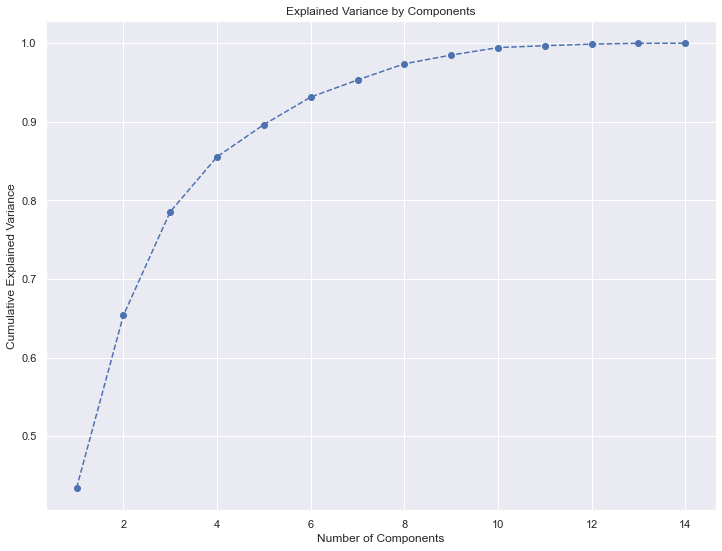

In [40]:
# Plot the cumulative variance explained by total number of components.
# On this graph we choose the subset of components we want to keep. 
# Generally, we want to keep around 80 % of the explained variance.
plt.figure(figsize = (12,9))
plt.plot(range(1,15), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

In [41]:
# We choose three components. 5 seems the right choice according to the previous graph, due to it allows to preserve 
#around 85% of the data with only 1/5 of the variables.
pca = PCA(n_components = 4)

In [42]:
#Fit the model the our data with the selected number of components. In our case three.
pca.fit(players_2019_std)

PCA(n_components=4)

### ${\textbf{PCA Results}}$

In [43]:
# Here we discucss the results from the PCA.
# The components attribute shows the loadings of each component on each of the seven original features.
# The loadings are the correlations between the components and the original features. 
pca.components_

array([[-0.37087054,  0.30729535, -0.06930676,  0.24477711,  0.27030695,
         0.37669531,  0.21181363,  0.37298098, -0.00404041,  0.37507738,
         0.14808547,  0.1361908 ,  0.33326621,  0.11007882],
       [-0.00308727, -0.10428757, -0.10318956,  0.3944806 ,  0.05548221,
         0.04804522,  0.37647587, -0.13349654, -0.36602013,  0.0464331 ,
        -0.51373385, -0.50515125, -0.04035987,  0.03245895],
       [ 0.01571946,  0.27197858, -0.61320105, -0.06075827, -0.34861618,
        -0.21050398,  0.32076417, -0.16749848,  0.19297839, -0.21857699,
         0.05273651,  0.02175027,  0.32755986,  0.23176857],
       [ 0.12150241, -0.12249605,  0.04380159, -0.15242903, -0.04662267,
         0.02908873, -0.11240715,  0.11012904, -0.41047405,  0.03626589,
         0.01919332,  0.1224948 , -0.06385812,  0.85325243]])

In [44]:
df_pca_comp = pd.DataFrame(data = pca.components_,
                           columns = numerical_data.columns.values,
                           index = ['Component 1', 'Component 2', 'Component 3', 'Component 4'])
df_pca_comp

,Ranking,Points,Tourn Played,Aces,Double Faults,Service Games Played,Total Service Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %,Career Length
Component 1,-0.370871,0.307295,-0.069307,0.244777,0.270307,0.376695,0.211814,0.372981,-0.004040,0.375077,0.148085,0.136191,0.333266,0.110079
Component 2,-0.003087,-0.104288,-0.103190,0.394481,0.055482,0.048045,0.376476,-0.133497,-0.366020,0.046433,-0.513734,-0.505151,-0.040360,0.032459
Component 3,0.015719,0.271979,-0.613201,-0.060758,-0.348616,-0.210504,0.320764,-0.167498,0.192978,-0.218577,0.052737,0.021750,0.327560,0.231769
Component 4,0.121502,-0.122496,0.043802,-0.152429,-0.046623,0.029089,-0.112407,0.110129,-0.410474,0.036266,0.019193,0.122495,-0.063858,0.853252


([<matplotlib.axis.YTick at 0x1b82b5fb288>,
 [Text(0, 0, 'Component 1'),
  Text(0, 1, 'Component 2'),
  Text(0, 2, 'Component 3'),
  Text(0, 3, 'Component 4')])

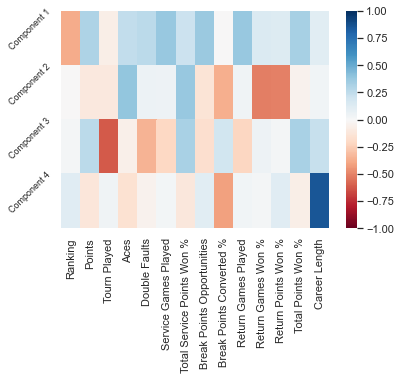

In [45]:
# Heat Map for Principal Components against original features. Again we use the RdBu color scheme and set borders to -1 and 1.
sns.heatmap(df_pca_comp,
            vmin = -1, 
            vmax = 1,
            cmap = 'RdBu')
plt.yticks([0, 1, 2, 3], 
           ['Component 1', 'Component 2', 'Component 3', 'Component 4'],
           rotation = 45,
           fontsize = 9)

### We can define the 4 components according their correlations with each component of the game as follows:
#### Component 1: Players with the most complete game, they have high effectivity serving and can win points either serving or returning. They create many break point opportunities.
#### Component 2: Best servers but not good returners.
#### Component 3: They don't play many tournements, make few mistakes with their service. They make points both serving and returning.
#### Component 4: Experienced players/long careers. They don't usually break their opponent's service when the opportunity is given

In [46]:
##we had the loadings (correlation of between each original variable and a component) mapped before, but we'll now reduce
##the dimensionality to 5 components to make it more manageable

pca.transform(players_2019_std)

array([[ 6.36577289e+00, -3.00871315e+00,  4.60143608e+00,
         2.15244579e-01],
       [ 6.26978003e+00, -2.71125657e+00,  3.78713145e+00,
        -4.35002359e-01],
       [ 5.55920714e+00, -1.43985138e-01,  3.75883430e+00,
         9.73474008e-01],
       [ 3.77908931e+00, -4.67018404e-01,  9.29472337e-01,
        -8.58068672e-01],
       [ 5.96095648e+00, -1.05055060e+00, -3.51406348e-01,
        -1.57781969e+00],
       [ 4.80475967e+00,  8.82394029e-01, -1.15413895e+00,
        -1.35447526e+00],
       [ 4.85344087e+00, -3.42787611e-02, -1.97961476e+00,
        -8.96750501e-01],
       [ 2.80276287e+00,  1.60453479e+00, -6.95518478e-01,
        -1.30784154e+00],
       [ 3.06497812e+00, -8.33915204e-01,  6.82532007e-01,
         7.13352076e-01],
       [ 3.22678501e+00, -1.16664184e+00,  4.52945288e-01,
         6.72124132e-01],
       [ 2.72513490e+00, -1.84836616e+00, -9.26524780e-01,
         2.36908445e-03],
       [ 1.74654878e+00, -1.92547871e+00, -3.01928256e-01,
      

In [47]:
scores_pca = pca.transform(players_2019_std)

### ${\textbf{K-means clustering with PCA}}$

In [48]:
# We fit K means using the transformed data from the PCA.
wcss = []
##within clusters sum of squares (wcss)
for i in range(1,11):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 1)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

C:\Users\Vanessa\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


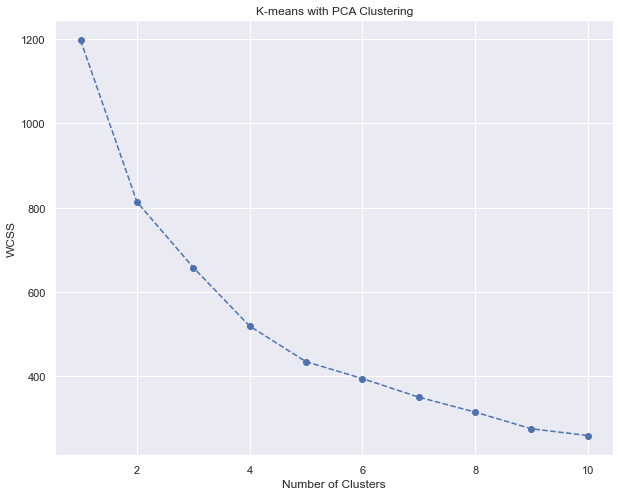

In [49]:
# Plot the Within Cluster Sum of Squares for the K-means PCA model. Here we make a decission about the number of clusters.
# Again it looks like four is the best option.
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), wcss, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('K-means with PCA Clustering')
plt.show()

In [50]:
# We have chosen four clusters, so we run K-means with number of clusters equals four. 
# Same initializer and random state as before.
kmeans_pca = KMeans(n_clusters = 4, init = 'k-means++', random_state =1)

In [51]:
# We fit our data with the k-means pca model
kmeans_pca.fit(scores_pca)

KMeans(n_clusters=4, random_state=1)

### ${\textbf{K-means clustering with PCA Results}}$

In [52]:
# We create a new data frame with the original features and add the PCA scores and assigned clusters.
df_players_2019_pca_kmeans = pd.concat([df_players_2019.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_players_2019_pca_kmeans.columns.values[-4: ] = ['Component 1', 'Component 2', 'Component 3', 'Component 4']
# The last column we add contains the pca k-means clustering labels.
df_players_2019_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [53]:
df_players_2019_pca_kmeans

,Ranking,Player,Points,Tourn Played,Aces,Double Faults,Service Games Played,Total Service Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %,Career Length,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA
0,1,Rafael Nadal,9985,17,271,118,737,70,556,45,715,35,42,56,18,6.365773,-3.008713,4.601436,0.215245,1
1,2,Novak Djokovic,9145,17,373,166,825,69,516,49,796,32,42,55,16,6.269780,-2.711257,3.787131,-0.435002,1
2,3,Roger Federer,6590,17,481,100,815,72,507,41,809,25,39,55,21,5.559207,-0.143985,3.758834,0.973474,1
3,4,Dominic Thiem,5825,22,314,138,827,67,466,41,823,23,37,52,8,3.779089,-0.467018,0.929472,-0.858069,1
4,5,Daniil Medvedev,5705,24,690,254,963,67,622,43,963,28,40,53,5,5.960956,-1.050551,-0.351406,-1.577820,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Salvatore Caruso,586,28,11,17,134,58,88,47,134,31,41,49,9,-3.586363,-3.842846,0.534208,0.108089,3
96,97,Alexei Popyrin,585,25,248,121,402,64,174,33,405,14,32,49,2,-2.399189,1.887428,-0.754864,-0.728132,3
97,98,Egor Gerasimov,581,23,130,38,188,67,89,27,186,13,35,50,9,-3.155667,1.990861,1.168703,0.932849,3
98,99,Lloyd Harris,576,24,200,57,257,61,100,45,255,18,33,48,4,-3.632025,0.005264,0.240622,-1.195476,3


In [54]:
# We calculate the means by segments.
df_players_2019_pca_kmeans_freq = df_players_2019_pca_kmeans.groupby(['Segment K-means PCA']).mean()
df_players_2019_pca_kmeans_freq

,Ranking,Points,Tourn Played,Aces,Double Faults,Service Games Played,Total Service Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %,Career Length,Component 1,Component 2,Component 3,Component 4
Segment K-means PCA,,,,,,,,,,,,,,,,,,
0,44.370370,1210.000000,25.981481,298.500000,143.370370,600.277778,64.055556,322.518519,38.685185,600.370370,20.796296,36.314815,50.185185,9.648148,0.467328,-0.006261,-0.605122,0.145910
1,7.083333,4800.416667,21.666667,386.666667,178.833333,810.500000,66.500000,518.750000,41.666667,802.583333,27.166667,39.666667,52.750000,11.416667,4.331218,-1.302162,0.922022,-0.167373
2,51.000000,1117.750000,19.250000,652.125000,113.375000,473.875000,70.500000,170.750000,32.625000,472.125000,12.125000,30.750000,50.625000,12.375000,-0.036528,4.023268,1.445265,0.148672
3,83.115385,672.769231,24.615385,104.461538,56.423077,255.423077,61.653846,129.500000,40.615385,255.807692,20.192308,36.038462,48.846154,6.653846,-2.958389,-0.623928,0.386547,-0.271539


In [55]:
# Calculate the size of each cluster and its proportion to the entire data set.
df_players_2019_pca_kmeans_freq['N Obs'] = df_players_2019_pca_kmeans[['Segment K-means PCA','Ranking']].groupby(['Segment K-means PCA']).count()
df_players_2019_pca_kmeans_freq['Prop Obs'] = df_players_2019_pca_kmeans_freq['N Obs'] / df_players_2019_pca_kmeans_freq['N Obs'].sum()
df_players_2019_pca_kmeans_freq = df_players_2019_pca_kmeans_freq.rename({0:'Great-Players', 
                                                          1:'Top-Players',
                                                          2:'Average-Players',
                                                          3: 'Worst-Players'})               
df_players_2019_pca_kmeans_freq

,Ranking,Points,Tourn Played,Aces,Double Faults,Service Games Played,Total Service Points Won %,Break Points Opportunities,Break Points Converted %,Return Games Played,Return Games Won %,Return Points Won %,Total Points Won %,Career Length,Component 1,Component 2,Component 3,Component 4,N Obs,Prop Obs
Segment K-means PCA,,,,,,,,,,,,,,,,,,,,
Great-Players,44.370370,1210.000000,25.981481,298.500000,143.370370,600.277778,64.055556,322.518519,38.685185,600.370370,20.796296,36.314815,50.185185,9.648148,0.467328,-0.006261,-0.605122,0.145910,54,0.54
Top-Players,7.083333,4800.416667,21.666667,386.666667,178.833333,810.500000,66.500000,518.750000,41.666667,802.583333,27.166667,39.666667,52.750000,11.416667,4.331218,-1.302162,0.922022,-0.167373,12,0.12
Average-Players,51.000000,1117.750000,19.250000,652.125000,113.375000,473.875000,70.500000,170.750000,32.625000,472.125000,12.125000,30.750000,50.625000,12.375000,-0.036528,4.023268,1.445265,0.148672,8,0.08
Worst-Players,83.115385,672.769231,24.615385,104.461538,56.423077,255.423077,61.653846,129.500000,40.615385,255.807692,20.192308,36.038462,48.846154,6.653846,-2.958389,-0.623928,0.386547,-0.271539,26,0.26


In [56]:
df_players_2019_pca_kmeans['Legend'] = df_players_2019_pca_kmeans['Segment K-means PCA'].map({0:'Great-Players', 
                                                          1:'Top-Players',
                                                          2:'Average-Players',
                                                          3: 'Worst-Players'})               
df_players_2019_pca_kmeans

,Ranking,Player,Points,Tourn Played,Aces,Double Faults,Service Games Played,Total Service Points Won %,Break Points Opportunities,Break Points Converted %,...,Return Games Won %,Return Points Won %,Total Points Won %,Career Length,Component 1,Component 2,Component 3,Component 4,Segment K-means PCA,Legend
0,1,Rafael Nadal,9985,17,271,118,737,70,556,45,...,35,42,56,18,6.365773,-3.008713,4.601436,0.215245,1,Top-Players
1,2,Novak Djokovic,9145,17,373,166,825,69,516,49,...,32,42,55,16,6.269780,-2.711257,3.787131,-0.435002,1,Top-Players
2,3,Roger Federer,6590,17,481,100,815,72,507,41,...,25,39,55,21,5.559207,-0.143985,3.758834,0.973474,1,Top-Players
3,4,Dominic Thiem,5825,22,314,138,827,67,466,41,...,23,37,52,8,3.779089,-0.467018,0.929472,-0.858069,1,Top-Players
4,5,Daniil Medvedev,5705,24,690,254,963,67,622,43,...,28,40,53,5,5.960956,-1.050551,-0.351406,-1.577820,1,Top-Players
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Salvatore Caruso,586,28,11,17,134,58,88,47,...,31,41,49,9,-3.586363,-3.842846,0.534208,0.108089,3,Worst-Players
96,97,Alexei Popyrin,585,25,248,121,402,64,174,33,...,14,32,49,2,-2.399189,1.887428,-0.754864,-0.728132,3,Worst-Players
97,98,Egor Gerasimov,581,23,130,38,188,67,89,27,...,13,35,50,9,-3.155667,1.990861,1.168703,0.932849,3,Worst-Players
98,99,Lloyd Harris,576,24,200,57,257,61,100,45,...,18,33,48,4,-3.632025,0.005264,0.240622,-1.195476,3,Worst-Players


C:\Users\Vanessa\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


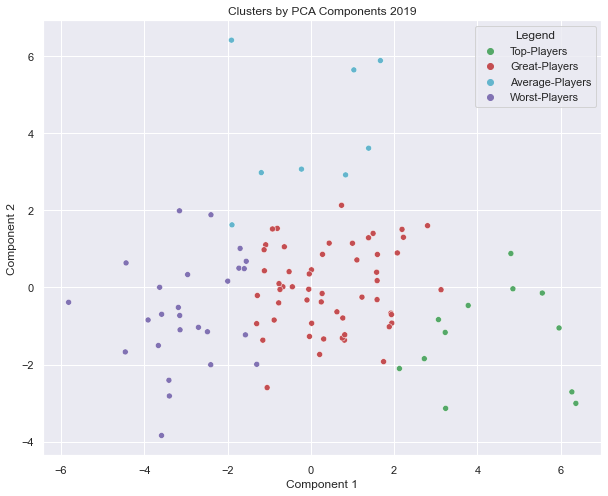

In [57]:
# Plot data by PCA components. The Y axis is the first component, X axis is the second.
x_axis = df_players_2019_pca_kmeans['Component 1']
y_axis = df_players_2019_pca_kmeans['Component 2']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_players_2019_pca_kmeans['Legend'], palette = ['g', 'r', 'c', 'm'])
plt.title('Clusters by PCA Components 2019')
plt.show()